In [99]:
import torch
import numpy as np
import torch.nn as nn
from copy import deepcopy

In [248]:
class mynet(nn.Module):
    def __init__(self):
        super(mynet,self).__init__()

        self.sub_act_size = [1,1]

        self.one = nn.Linear(in_features=1,
                            out_features=5)
        self.two = nn.Linear(in_features=5,
                            out_features=10)
        self.three = nn.Linear(in_features=10,
                            out_features=5)
        self.four = nn.Linear(in_features=5,
                            out_features=1)
        self.act = torch.nn.LeakyReLU(0.1)

    def forward(self,x1,x2):
        w = self.one(x2)
        w = self.act(w)
        w = self.two(w)
        w = w*w
        w = self.three(w)
        w = self.act(w)
        w = self.four(w)
        return x1 * w.view(-1,1)

In [249]:
x1_test = torch.rand(10000,1) * 100
x2_test = torch.rand(10000,1) * 100
y_test = x1_test * torch.sqrt(torch.abs(x2_test)) * 2

In [250]:
model = mynet()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda = lambda epoch : 0.9**epoch+1e-5,
                                        last_epoch = -1,
                                        verbose = False)
loss_h=[]

In [254]:
iteration = 100000
for epoch in range(1,iteration+1):
    optimizer.zero_grad()
    y = model(x1_test,x2_test)
    loss = loss_fn(y,y_test)
    loss.backward()
    optimizer.step()
    loss_h.append(loss)
    if(epoch%1000==0):
        print('Progress : {:6.3}/100 | Loss : {}'.format(epoch/iteration*100,loss))

Progress : 1/100 | Loss : 395.26220703125
Progress : 2/100 | Loss : 375.34429931640625
Progress : 3/100 | Loss : 358.8765869140625
Progress : 4/100 | Loss : 343.72052001953125
Progress : 5/100 | Loss : 329.6498107910156
Progress : 6/100 | Loss : 316.8761901855469
Progress : 7/100 | Loss : 305.4255065917969
Progress : 8/100 | Loss : 294.8362731933594
Progress : 9/100 | Loss : 285.4358215332031
Progress : 10/100 | Loss : 277.0328369140625
Progress : 11/100 | Loss : 268.1866149902344
Progress : 12/100 | Loss : 260.5543518066406
Progress : 13/100 | Loss : 1284.5518798828125
Progress : 14/100 | Loss : 247.28343200683594
Progress : 15/100 | Loss : 239.641845703125
Progress : 16/100 | Loss : 200.6580047607422
Progress : 17/100 | Loss : 1716.4307861328125
Progress : 18/100 | Loss : 156.0148162841797
Progress : 19/100 | Loss : 141.9475555419922
Progress : 20/100 | Loss : 136.19070434570312
Progress : 21/100 | Loss : 133.51451110839844
Progress : 22/100 | Loss : 1189.891357421875
Progress : 23/1

In [255]:
torch.save(model.state_dict(),'./test_save.pt')

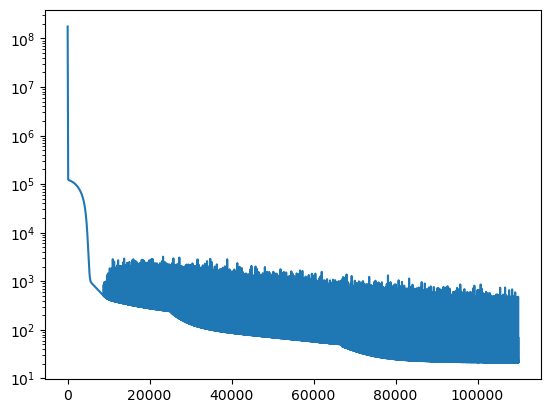

In [256]:
import matplotlib.pyplot as plt
for i in range(len(loss_h)):
    try:
        loss_h[i] = loss_h[i].detach().numpy()
    except:
        continue
plt.plot(range(1,len(loss_h)+1),loss_h)
plt.yscale('log')

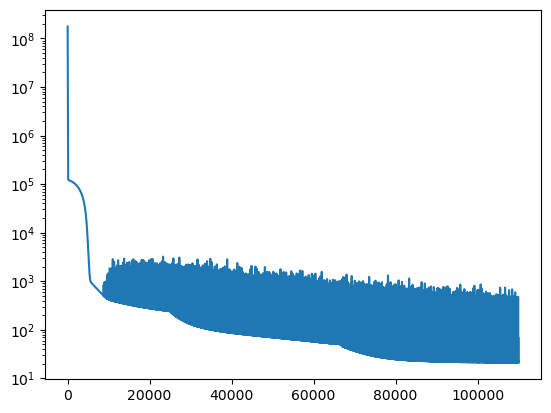

In [259]:
plt.plot(df.index,df)
plt.yscale('log')

In [257]:
import pandas as pd

df = pd.DataFrame(loss_h)
df

,0
0,1.760860e+08
1,1.644374e+08
2,1.534091e+08
3,1.429852e+08
4,1.331481e+08
...,...
109995,2.127015e+01
109996,2.127055e+01
109997,2.126719e+01
109998,2.126268e+01


In [258]:
df.to_excel("test_save.xlsx")

In [253]:
x1_ = torch.Tensor([[234]])
x2_ = torch.Tensor([[463]])
model(x1_,x2_),(x1_*torch.sqrt(torch.abs(x2_))*2)

(tensor([[-24766.3242]], grad_fn=<MulBackward0>), tensor([[10070.1592]]))